In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from PIL import Image, ImageDraw
  

In [2]:
def Ux(p,eta,theta,X0,Y0,X,Y):
    temp1 =-p/(8*3.141*eta)
    temp2 = (np.sqrt((X-X0)**2+(Y-Y0)**2))**-3
    temp3 = 1-3*np.cos(theta*3.141/180)**2
    temp4 = (X-X0)
    
    return(temp1*temp2*temp3*temp4)

def Uy(p,eta,theta,X0,Y0,X,Y):
    temp1 =-p/(8*3.141*eta)
    temp2 = (np.sqrt((X-X0)**2+(Y-Y0)**2))**-3
    temp3 = 1-3*np.cos(theta*3.141/180)**2
    temp4 = (Y-Y0)
    
    return(temp1*temp2*temp3*temp4)

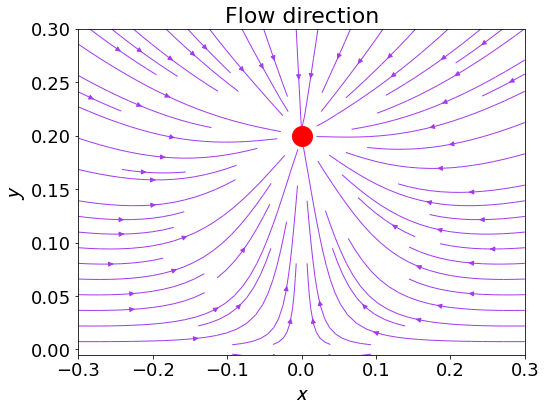

In [3]:
p     = 100
eta   = 2E+5
theta = 90
X0    = 0
Y0    = .2

# 1D arrays
#X = np.arange(-.3,.3,0.001)
#Y = np.arange(-.3,.3,0.001)
X = np.linspace(-.3,.3,50)
Y = np.linspace(-.3,.3,50)

# Meshgrid
X1,Y1 = np.meshgrid(X,Y)

# Assign vector directions
Ex = Ux(p,eta,theta,X0,Y0,X1,Y1)+Ux(p,eta,theta,X0,-Y0,X1,Y1)
Ey = Uy(p,eta,theta,X0,Y0,X1,Y1)+Uy(p,eta,theta,-X0,-Y0,X1,Y1)

# Depict illustration
plt.figure(figsize=(8, 6))
plt.streamplot(X,Y,Ex,Ey, density= 1.4, linewidth=1, color='#A23BEC')
#plt.streamplot(X1,Y1,Ex,Ey, density= 2.4, linewidth=None, color= 'b')
plt.plot(0,Y0,'-or',markersize=20)
#plt.plot(1,0,'-og')
plt.ylim(-.005,.3)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('Flow direction',fontsize=22)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('C1_vector.eps')

Locator attempting to generate 1001 ticks ([-1.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


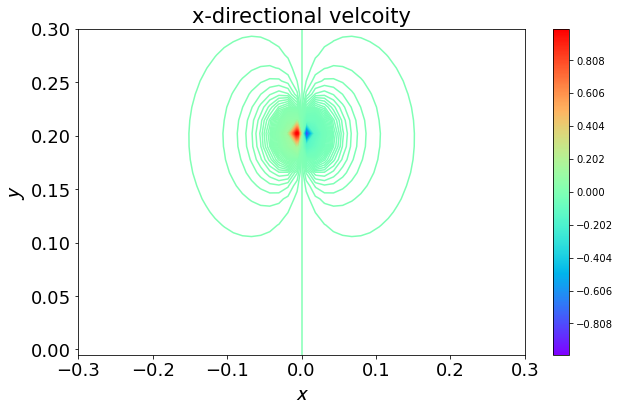

In [4]:
plt.figure(figsize=(10, 6))
plt.contour(X1, Y1, Ex/np.amax(Ex), 1000, cmap='rainbow')
plt.ylim(-.005,.3)
plt.colorbar();
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('x-directional velcoity',fontsize=21)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.savefig('C1_Xvel.eps')

Locator attempting to generate 1001 ticks ([-1.0, ..., 1.0000000000000002]), which exceeds Locator.MAXTICKS (1000).


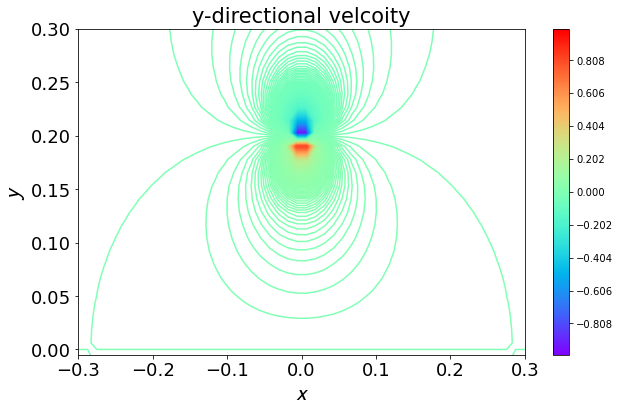

In [5]:
plt.figure(figsize=(10, 6))
plt.contour(X1, Y1, Ey/np.amax(Ey), 1000, cmap='rainbow')
plt.ylim(-.005,.3)
plt.colorbar();
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('y-directional velcoity',fontsize=21)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.savefig('C1_Yvel.eps')

In [6]:
np.amax(Ex)

0.45323890016918084

Text(0.5, 1.0, 'Velocity vector ')

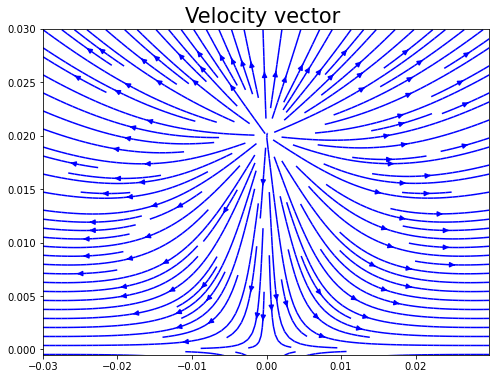

In [7]:
p     = 100
eta   = 2E+5
theta = 0
X0    = 0
Y0    = .02

# 1D arrays
X = np.arange(-.03,.03,0.0001)
Y = np.arange(-.03,.03,0.0001)


# Meshgrid
X1,Y1 = np.meshgrid(X,Y)

# Assign vector directions
Ex = Ux(p,eta,theta,X0,Y0,X1,Y1)+Ux(p,eta,theta,X0,-Y0,X1,Y1)
Ey = Uy(p,eta,theta,X0,Y0,X1,Y1)+Uy(p,eta,theta,-X0,-Y0,X1,Y1)

# Depict illustration

plt.figure(figsize=(8, 6))
#plt.streamplot(X,Y,Ex,Ey, density= 1.4, linewidth=None, color='#A23BEC')
plt.streamplot(X,Y,Ex,Ey, density= 2.4, linewidth=None, color= 'b')
#plt.plot(-1,0,'-or')
#plt.plot(1,0,'-og')
plt.ylim(-.0005,.03)
plt.title('Velocity vector ',fontsize=21)

# POWER

In [61]:
def uy_dp(p,eta,y0,theta):
    temp1 = -p/(64*3.141*eta*y0*y0)
    temp2 = 1-3*np.cos(theta*3.141/180)*np.cos(theta*3.141/180)
    return(temp1*temp2)

def uy_F(F,eta,y0,theta):
    temp1 = abs(F)*np.cos(theta*3.141/180)/(8*3.141*eta*y0)
    return(temp1)
def ux(F,eta,y0,theta):
    temp1 = abs(F)*np.sin(theta*3.141/180)/(16*3.141*eta*y0)
    return(temp1)

In [62]:
p     = 1
F     = 1
eta   = 2E0
theta = 90

theta = np.linspace(0,90,100)
Y     = np.linspace(0.00001,.3,50)

# Meshgrid
X2,Y2 = np.meshgrid(theta,Y)

Z1 = uy_dp(p,eta,Y2,X2)
Z2 = uy_F(F,eta,Y2,X2)

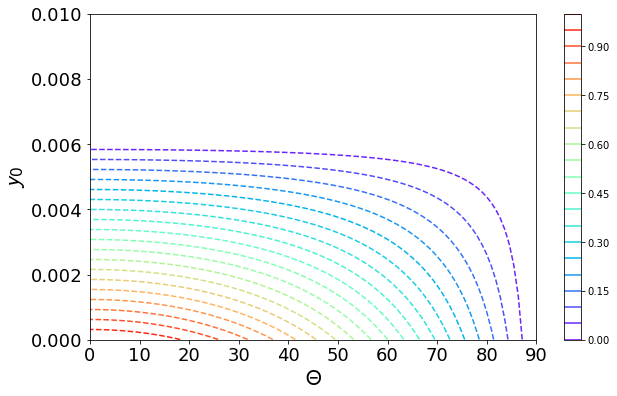

In [63]:
plt.figure(figsize=(10, 6))
#plt.contour(X2, Y2, Z1/np.amax(Z1), 20, cmap='rainbow')
plt.contour(X2, Y2, Z2/np.amax(Z2), 20, linestyles='dashed', cmap='rainbow')
plt.ylim(0,.01)
plt.colorbar();
plt.xlabel('$ \mathcal{\Theta} $',fontsize=22)
plt.ylabel('$\mathcal{y}_0$',fontsize=22)
#plt.title('Constant dipole strength ($p$)',fontsize=21)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
#plt.text(25, .0080, '$Repulsion$ ', fontsize = 20)
#plt.text(65, .0080, '$Attraction$ ', fontsize = 20)
plt.savefig('Power_2.eps')

In [80]:
def Powr(p,F,eta,y0,theta):
    temp1 = abs(F)**2*(1+np.cos(theta*3.141/180)**2)/(16*3.141*eta*y0)
    temp2 = p*abs(F)*(1-3*np.cos(theta*3.141/180)**2)*np.cos(theta*3.141/180)/(64*3.141*eta*y0*y0)
    return(temp1-temp2)

In [110]:
p     = 1
F     = 1000
eta   = 2E0

theta = np.linspace(0,90,100)
Y     = np.linspace(0.00001,.3,50)

# Meshgrid
X2,Y2 = np.meshgrid(theta,Y)

#Power = (uy_dp(p,eta,Y2,X2)+uy_F(F,eta,Y2,X2))*abs(F)*np.cos(X2*3.141/180)+ux(F,eta,Y2,X2)*abs(F)*np.sin(X2*3.141/180)
#Power = (uy_dp(p,eta,Y2,X2))*abs(F)*np.cos(X2*3.141/180)+ux(F,eta,Y2,X2)*abs(F)*np.sin(X2*3.141/180)
Power = ux(F,eta,Y2,X2)*abs(F)*np.sin(X2*3.141/180)

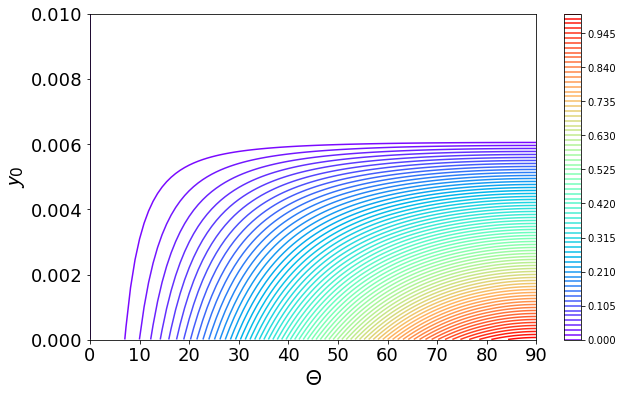

In [111]:
plt.figure(figsize=(10, 6))
#plt.contour(X2, Y2, Z1/np.amax(Z1), 200, cmap='rainbow')
plt.contour(X2, Y2, Power/np.amax(Power), 80, linestyles='solid', cmap='rainbow')
plt.ylim(0,.01)
plt.colorbar();
plt.xlabel('$ \mathcal{\Theta} $',fontsize=22)
plt.ylabel('$\mathcal{y}_0$',fontsize=22)
#plt.title('Constant dipole strength ($p$)',fontsize=21)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
#plt.text(25, .0080, '$Repulsion$ ', fontsize = 20)
#plt.text(65, .0080, '$Attraction$ ', fontsize = 20)
plt.savefig('Power_2.eps')

In [133]:
p     = 1
F     = 1
eta   = 2E0

theta = np.linspace(0,90,100)
Y     = np.linspace(0.0001,.1,40)

# Meshgrid
X2,Y2 = np.meshgrid(theta,Y)
Power = Powr(p,F,eta,Y2,X2)

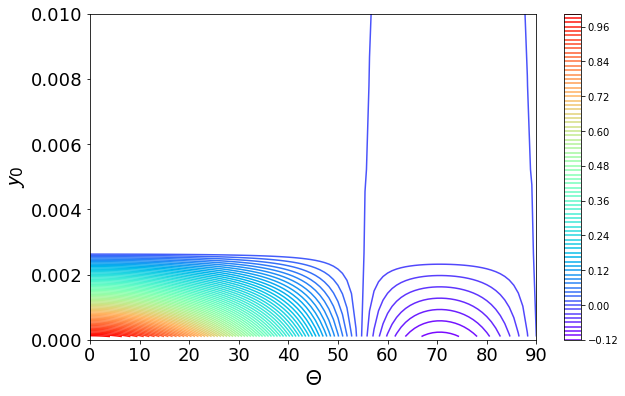

In [135]:
plt.figure(figsize=(10, 6))
plt.contour(X2, Y2, Power/np.amax(Power), 100, linestyles='solid', cmap='rainbow')
plt.ylim(0,.01)
plt.colorbar();
plt.xlabel('$ \mathcal{\Theta} $',fontsize=22)
plt.ylabel('$\mathcal{y}_0$',fontsize=22)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
#plt.text(25, .0080, '$Repulsion$ ', fontsize = 20)
#plt.text(65, .0080, '$Attraction$ ', fontsize = 20)
plt.savefig('Power.eps')

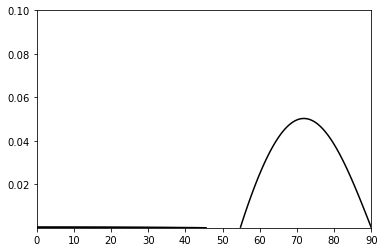

In [127]:
plt.contour(X2, Y2, Power, colors='black');